In [14]:
import GPy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(101)

In [15]:
N = 50
noise_var = 0.05

X = np.linspace(0,10,50)[:,None]
k = GPy.kern.RBF(1)
y = np.random.multivariate_normal(np.zeros(N),k.K(X)+np.eye(N)*np.sqrt(noise_var)).reshape(-1,1)

 /home/dsteinar/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


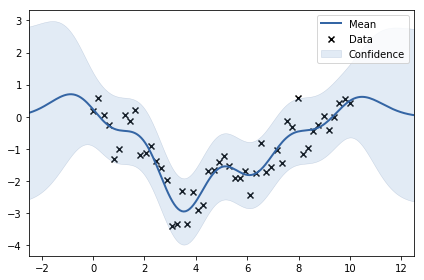

In [16]:
m_full = GPy.models.GPRegression(X,y)
m_full.optimize('bfgs')
m_full.plot()

 /home/dsteinar/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


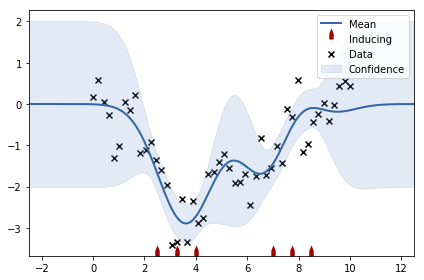

In [17]:
Z = np.hstack((np.linspace(2.5,4.,3),np.linspace(7,8.5,3)))[:,None]
m = GPy.models.SparseGPRegression(X,y,Z=Z)
m.likelihood.variance = noise_var
m.plot()

 /home/dsteinar/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


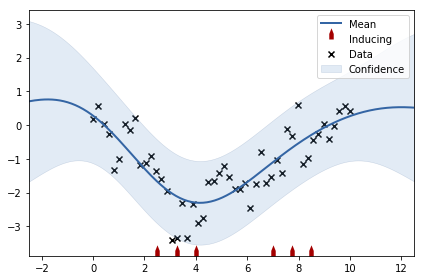

In [19]:
m.inducing_inputs.fix()
m.optimize('bfgs')
m.plot()

 /home/dsteinar/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


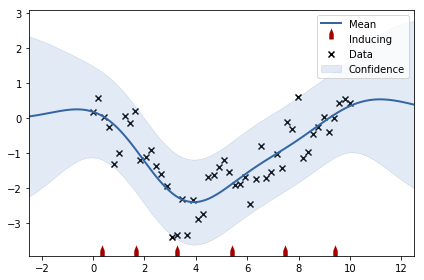

In [20]:
m.randomize()
m.Z.unconstrain()
m.optimize('bfgs')
m.plot()

In [1]:
m_full


NameError: name 'm_full' is not defined